In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae
from sklearn.model_selection import train_test_split as tts

In [ ]:
df = pd.read_csv("Real estate.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
#Analysing the data
import seaborn as sns
import matplotlib.pyplot as plt


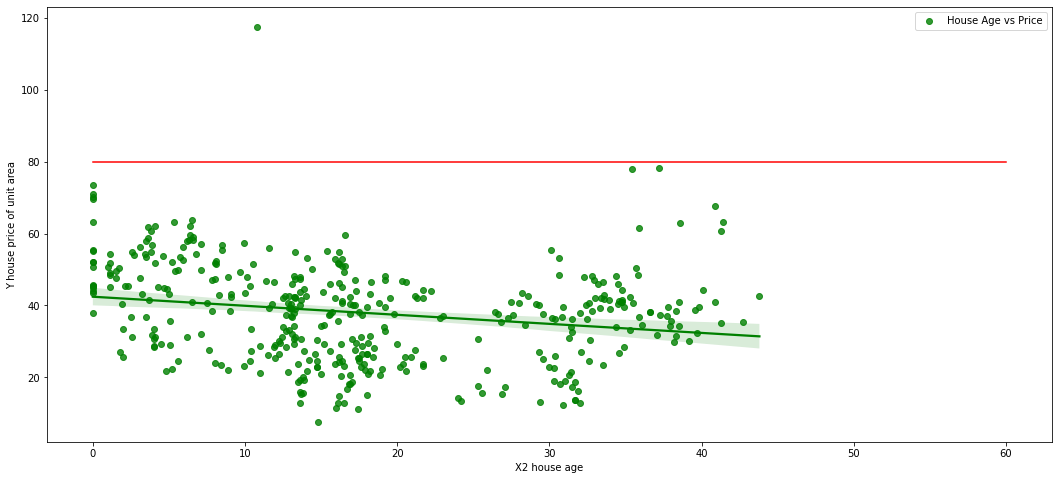

In [ ]:
plt.figure(figsize = (18,8))
sns.regplot(x = 'X2 house age', y = 'Y house price of unit area',label = 'House Age vs Price',color = 'g', data = df)
sns.lineplot(x= [0,60],y = [80,80], color = 'r')


In [ ]:
corr = df.iloc[:,1:8].corr()['Y house price of unit area']
corr

X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

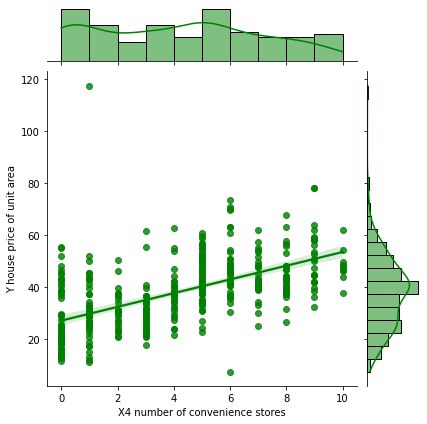

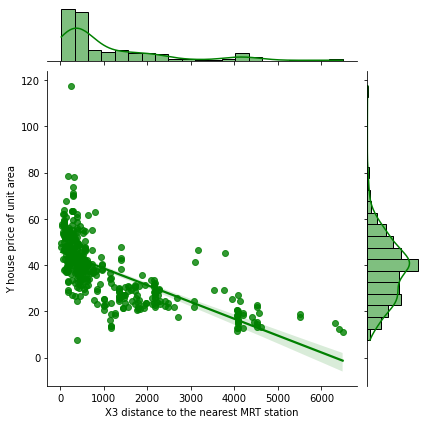

In [ ]:
sns.jointplot(x = 'X4 number of convenience stores', y = 'Y house price of unit area',kind = 'reg',color='g', data = df)
sns.jointplot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area',kind = 'reg',color='g', data = df)

In [ ]:
np.random.seed(1)
X = df.iloc[:,2:7].values
y = df.iloc[:,7].values
X_train, X_test, y_train, y_test = tts(X,y)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.681769971480724

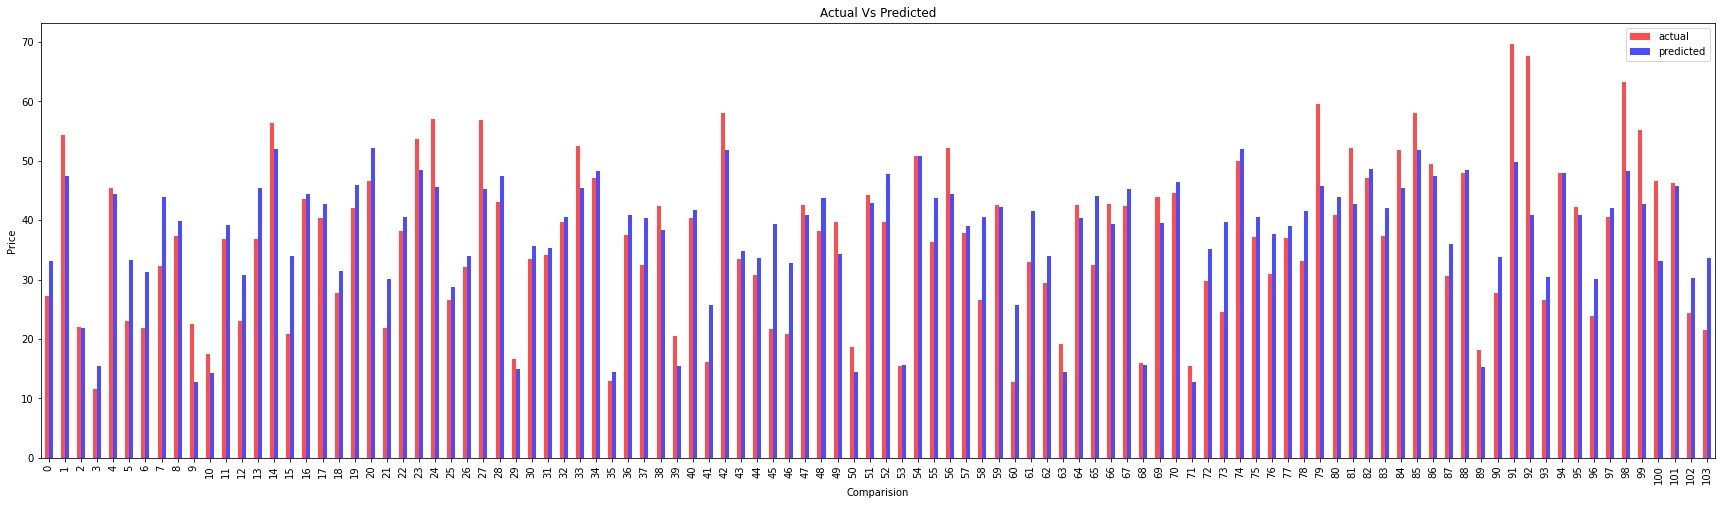

In [ ]:
compare = pd.DataFrame({"actual" : y_test, "predicted" : y_pred})
compare.plot(figsize = (30,8), kind= 'bar', color = ['red','blue'],alpha = .7)
plt.xlabel("Comparision")
plt.ylabel("Price")
plt.title("Actual Vs Predicted")
plt.show()

In [ ]:
np.random.seed(1)
new_df = df
new_X = new_df.iloc[:,2:7].values
new_y = new_df.iloc[:,7].values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#normalizing the data
new_y = np.log(new_y)

nX_train, nX_test, ny_train, ny_test = tts(new_X,new_y)
model2 = LinearRegression()
model2.fit(nX_train,ny_train)
ny_pred = model2.predict(nX_test)
print(r2_score(ny_test,ny_pred))
ny_test = np.exp(ny_test)
ny_pred = np.exp(ny_pred)

0.7585309605651912


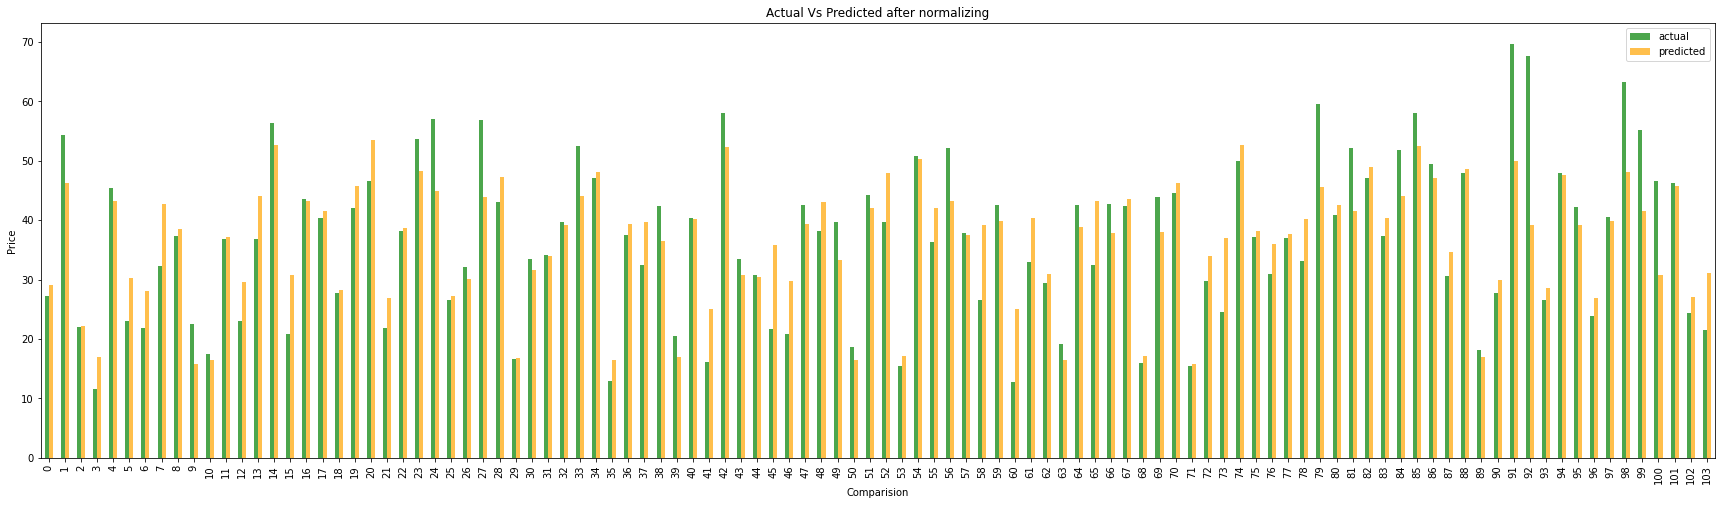

In [ ]:
compare2 = pd.DataFrame({"actual" : ny_test, "predicted" : ny_pred})
compare2.plot(figsize = (30,8), kind= 'bar', color = ['green','orange'],alpha = .7)
plt.xlabel("Comparision")
plt.ylabel("Price")
plt.title("Actual Vs Predicted after normalizing")
plt.show()

<h2 >How can the Accuracy be further improved? </h2>


1.   By more input data
2.   Normalization of the input data
3.   Outlining the abnormal data

<h2 > Correlation of columns  </h2>



```
pf = df.iloc[:,1:8]
corrMatrix = pf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corrMatrix,cmap='PiYG', annot=True)
plt.title("Correlation Matrix")
```
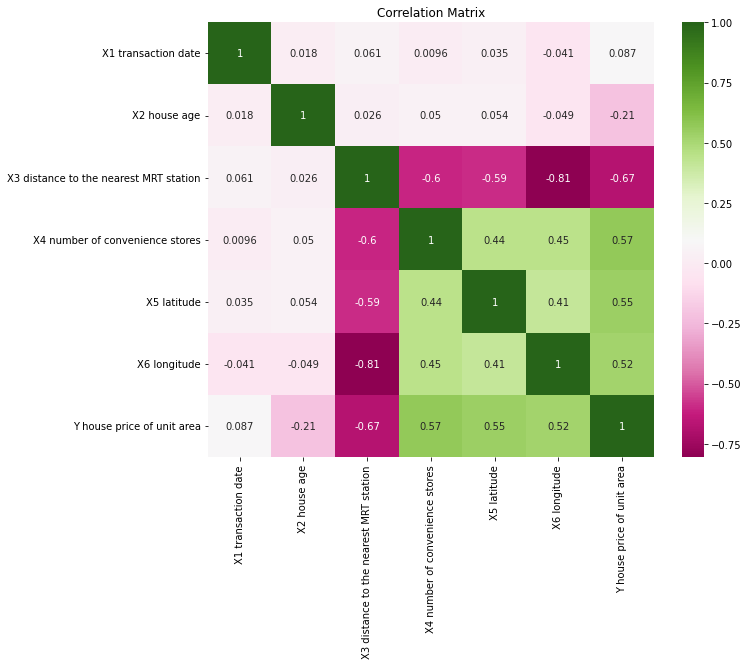



